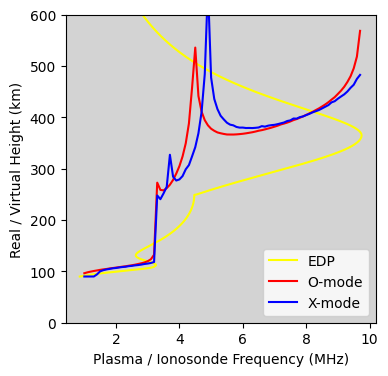

In [1]:
import pickle

import matplotlib.pyplot as plt

import PyRAY


# Load input arrays from the example.
# See Example_Generate_Input_Arrays for how to create input arrays using PyIRI.
file_open = 'Example_input.p'
input_arrays = pickle.load(open(file_open, 'rb'))

# Compute virtual height for the ordinary 'O' propagation mode.
# A low number of vertical grid points is sufficient for O-mode (e.g., 200).
mode = 'O'
n_points = 200
vh_O = PyRAY.library.virtical_forward_operator(input_arrays['freq'],
                                               input_arrays['den'],
                                               input_arrays['bmag'],
                                               input_arrays['bpsi'],
                                               input_arrays['alt'],
                                               mode,
                                               n_points)

# Compute virtual height for the extraordinary 'X' propagation mode.
# A high number of vertical grid points is recommended for X-mode (e.g., 20000),
# since the result may be noisy at low resolution.
mode = 'X'
n_points = 20000
vh_X = PyRAY.library.virtical_forward_operator(input_arrays['freq'],
                                               input_arrays['den'],
                                               input_arrays['bmag'],
                                               input_arrays['bpsi'],
                                               input_arrays['alt'],
                                               mode,
                                               n_points)

# Plot the results.
# The electron density profile (EDP) is converted from plasma density to plasma
# frequency and plotted using real altitude on the y-axis.
# Virtual heights for O-mode and X-mode are plotted with ionosonde frequency on
# the x-axis and virtual height on the y-axis.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
ax.set_ylim([0, 600])
ax.set_facecolor("lightgray")
ax.set_ylabel('Real / Virtual Height (km)')
ax.set_xlabel('Plasma / Ionosonde Frequency (MHz)')
ax.plot(PyRAY.library.den2freq(input_arrays['den']) / 1e6, input_arrays['alt'],
        c='yellow', label='EDP', zorder=1)
ax.plot(input_arrays['freq'], vh_O, c='red', label='O-mode', zorder=2)
ax.plot(input_arrays['freq'], vh_X, c='blue', label='X-mode', zorder=2)
plt.legend()
